In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# 鲍鱼性别预测、乳腺癌情况预测
# 乳腺癌数据集

In [3]:
data = pd.read_csv("data.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
# 获得标签 -> 良性B、恶性M
y = data['diagnosis']
del_cols = ['id', 'Unnamed: 32', 'diagnosis']
x = data.drop(columns=del_cols, axis=1)

# 数据中心化
x = (x - x.mean()) / (x.std())   

In [5]:
# 去掉噪音，去掉一部分冗余特征即可

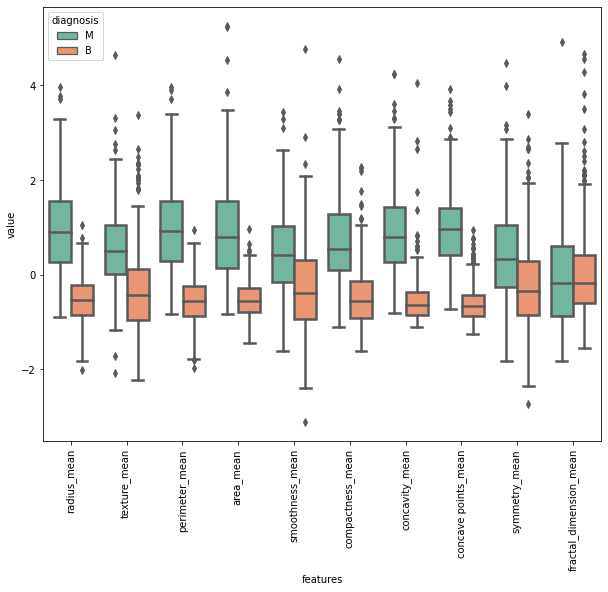

In [6]:
# 绘制箱型图
data = pd.concat([y, x.iloc[:,0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(10, 8))

# 肯定是会去unique的
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette="Set2", linewidth=2.5)
plt.xticks(rotation=90)
plt.savefig("0.svg")

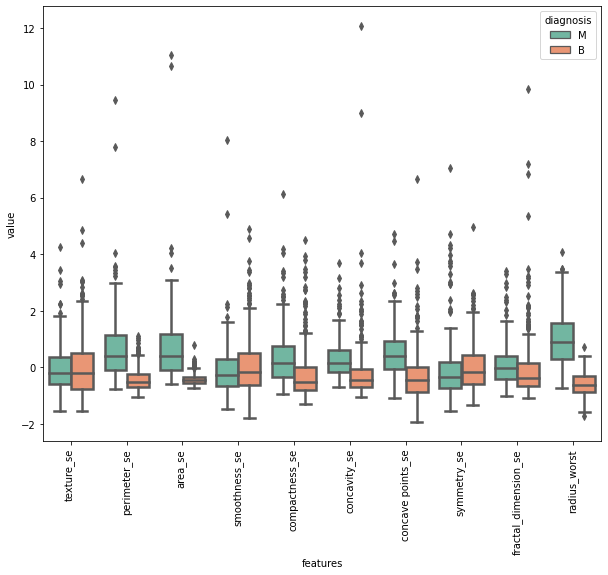

In [7]:
# 绘制箱型图
data = pd.concat([y, x.iloc[:,11:21]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(10, 8))

# 肯定是会去unique的
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette="Set2", linewidth=2.5)
plt.xticks(rotation=90)
plt.savefig("1.svg")

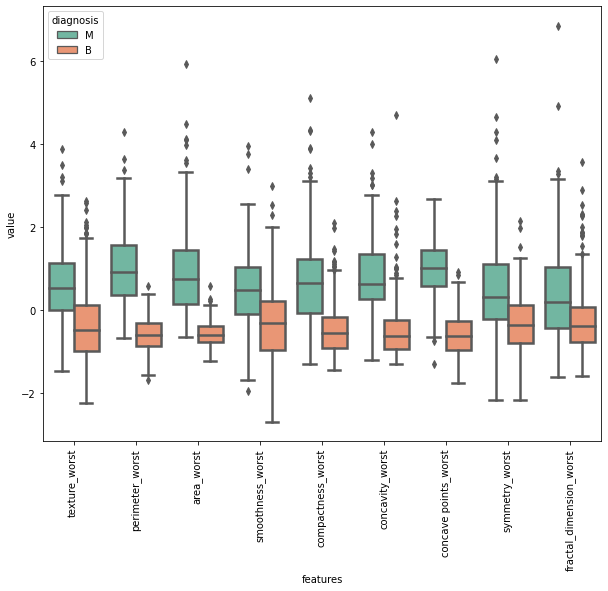

In [8]:
# 绘制箱型图
data = pd.concat([y, x.iloc[:, 21:31]], axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(10, 8))

# 肯定是会去unique的
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette="Set2", linewidth=2.5)
plt.xticks(rotation=90)
plt.savefig("2.svg")

In [9]:
# sns.pairplot(x, height=2.5)

In [10]:
# 去除异常值
K = 1.5
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1 

    filter = (x[col] >= Q1 - K * IQR) & (x[col] <= Q3 + K *IQR)
    x = x.loc[filter]
    y = y.loc[filter]

In [11]:
# 特征选择

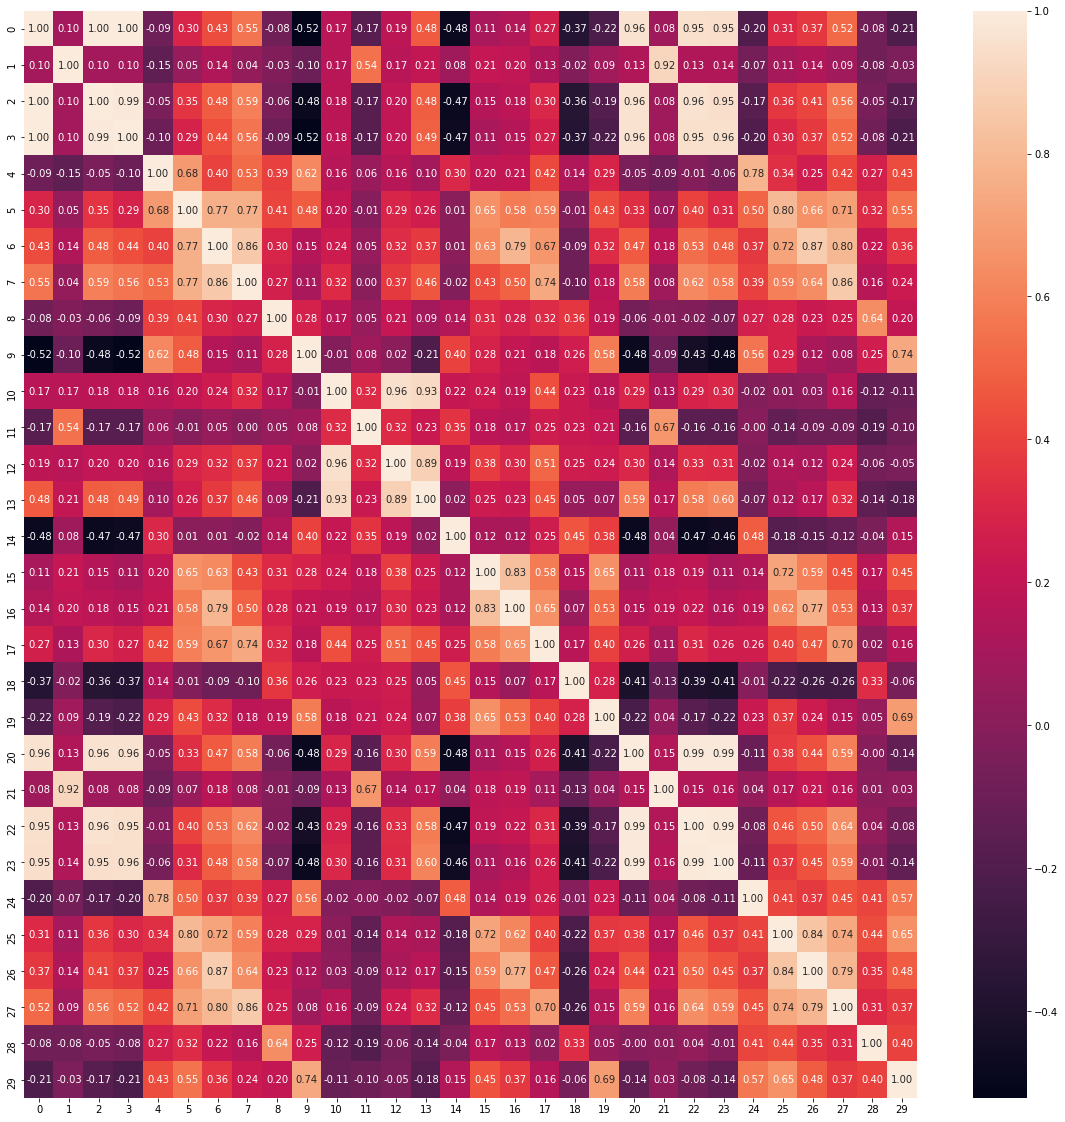

In [12]:
# 0-1转化 
y_ = y.copy()
y_[y_ == 'B'] = 0
y_[y_ == 'M'] = 1
data = pd.concat([x, y_], axis=1)
data['diagnosis'] = pd.to_numeric(data['diagnosis']) 
correlation = data.corr().to_numpy()
cmps = np.abs(correlation[-1, :-1])

# 属性相关系数矩阵绘制
plt.figure(figsize=(20, 20))
correlation = correlation[:-1, :-1]
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.savefig("0.svg")

In [13]:
# 构建剩余特征集合
res_features = np.arange(30)     
threshold = 0.8

for i in range(30):
    if i not in res_features:
        continue    
    relevant_features = res_features[np.where([correlation[i, res_features] > threshold])[0]]
    if relevant_features.size == 1:
        continue
    relevant_features = np.delete(relevant_features, np.argmax(cmps[relevant_features]))
    res_features = np.setdiff1d(res_features, relevant_features)

剩余特征数量: 13
剩余特征: [17 18 19 20 21 22 23 24 25 26 27 28 29]


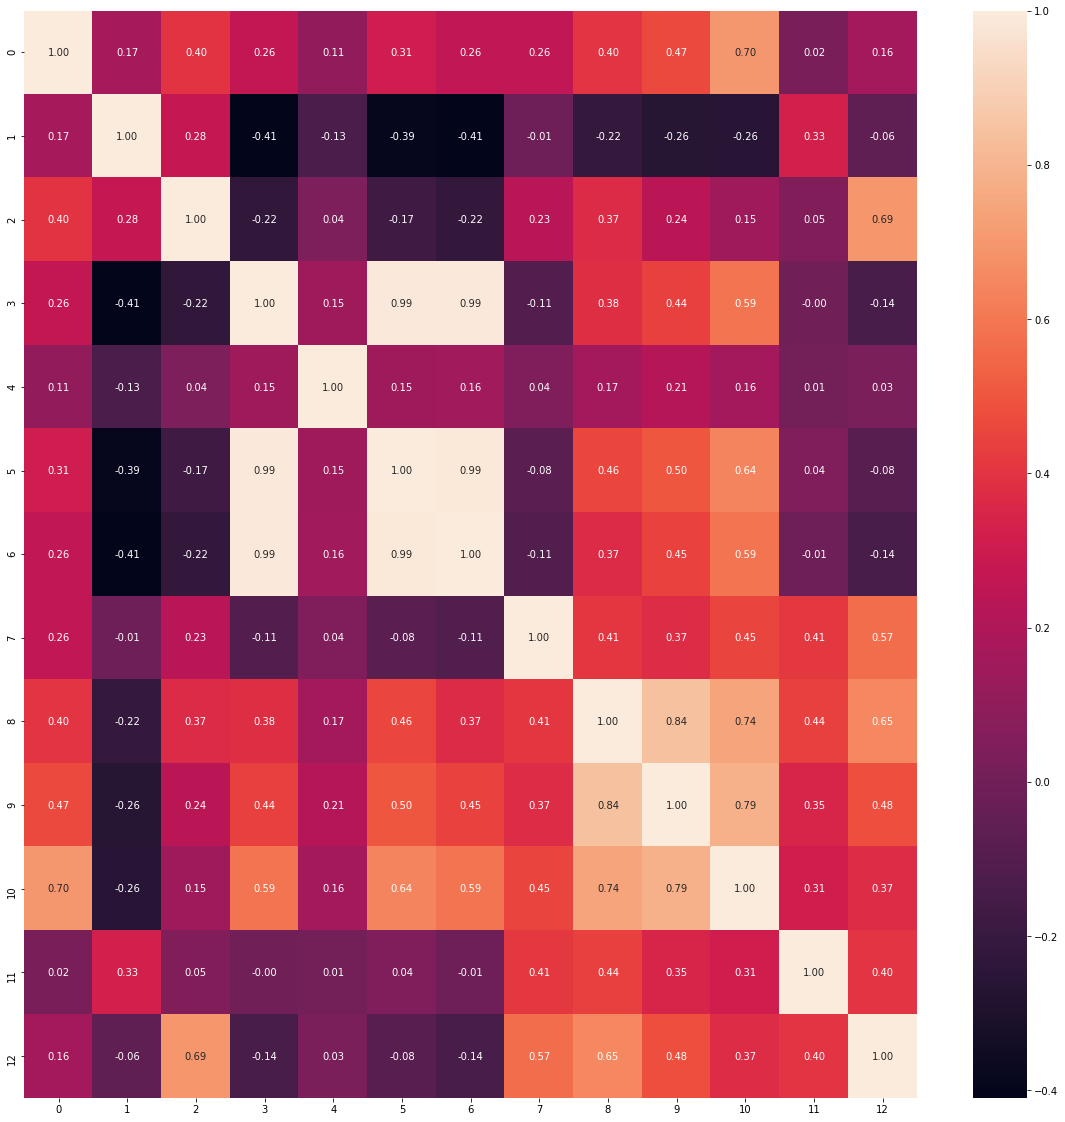

In [14]:
x = x[x.columns[res_features]]

# 相关系数矩阵绘制
plt.figure(figsize=(20, 20))
correlation = x.corr().to_numpy()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.savefig("1.svg")